In [63]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
import math
install('yfinance')
import yfinance as yf
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt


In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))

df_stock = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
df = pd.DataFrame(df_stock)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111496,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507286,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047247,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074554,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191271,283192000
...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.859360,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.320541,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.885544,108972300


Text(0, 0.5, 'Prices ($)')

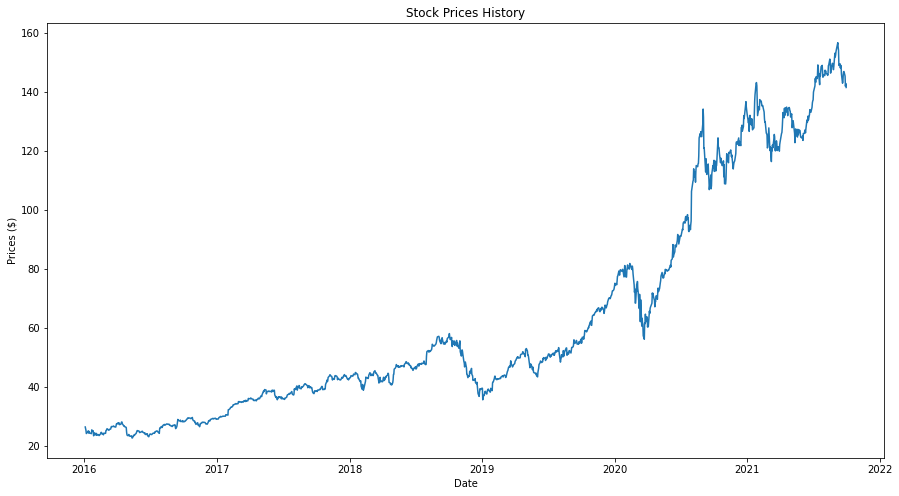

In [65]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [66]:
df['Date'] = pd.to_datetime(df.index.values,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.head()

,Date,Close
0,2016-01-04 00:00:00,26.3375
1,2016-01-05 00:00:00,25.6775
2,2016-01-06 00:00:00,25.174999
3,2016-01-07 00:00:00,24.112499
4,2016-01-08 00:00:00,24.24


In [67]:
!pip install fastai==0.7.0

from fastai.tabular.core import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastai-0.7.0-py3-none-any.whl (112 kB)
ERROR: Could not find a version that satisfies the requirement torch<0.4 (from fastai) (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0)
ERROR: No matching distribution found for torch<0.4


,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,26.3375,2016,1,1,4,0,4,False,False,False,False,False,False
1,25.6775,2016,1,1,5,1,5,False,False,False,False,False,False
2,25.174999,2016,1,1,6,2,6,False,False,False,False,False,False
3,24.112499,2016,1,1,7,3,7,False,False,False,False,False,False
4,24.24,2016,1,1,8,4,8,False,False,False,False,False,False


In [69]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
new_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,26.3375,2016,1,1,4,0,4,False,False,False,False,False,False,1
1,25.6775,2016,1,1,5,1,5,False,False,False,False,False,False,0
2,25.174999,2016,1,1,6,2,6,False,False,False,False,False,False,0
3,24.112499,2016,1,1,7,3,7,False,False,False,False,False,False,0
4,24.24,2016,1,1,8,4,8,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,146.919998,2021,9,38,24,4,267,False,False,False,False,False,False,1
1443,145.369995,2021,9,39,27,0,270,False,False,False,False,False,False,1
1444,141.910004,2021,9,39,28,1,271,False,False,False,False,False,False,0
1445,142.830002,2021,9,39,29,2,272,False,False,False,False,False,False,0


In [70]:
#split into train and validation
train = new_data[:1157]
valid = new_data[1157:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [71]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

49.97733504714812

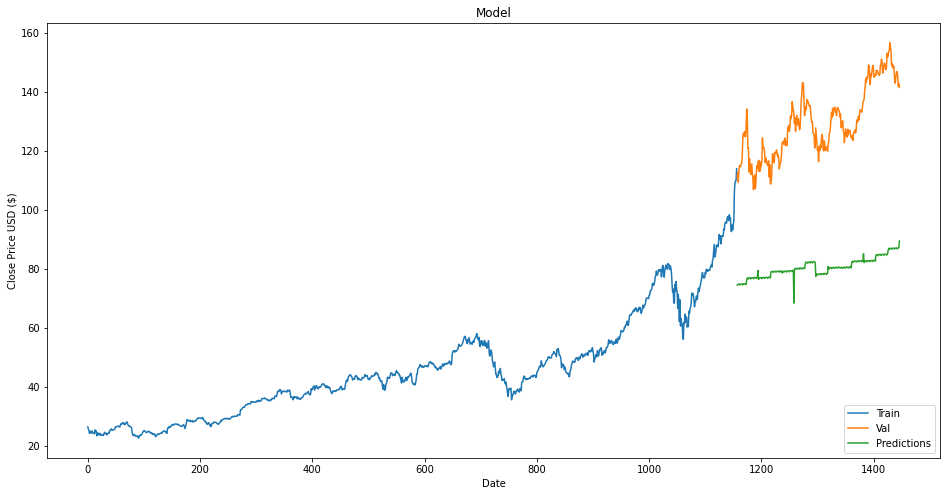

In [72]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1157:].index
train.index = new_data[:1157].index

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [73]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [74]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [75]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

71.57625293944554

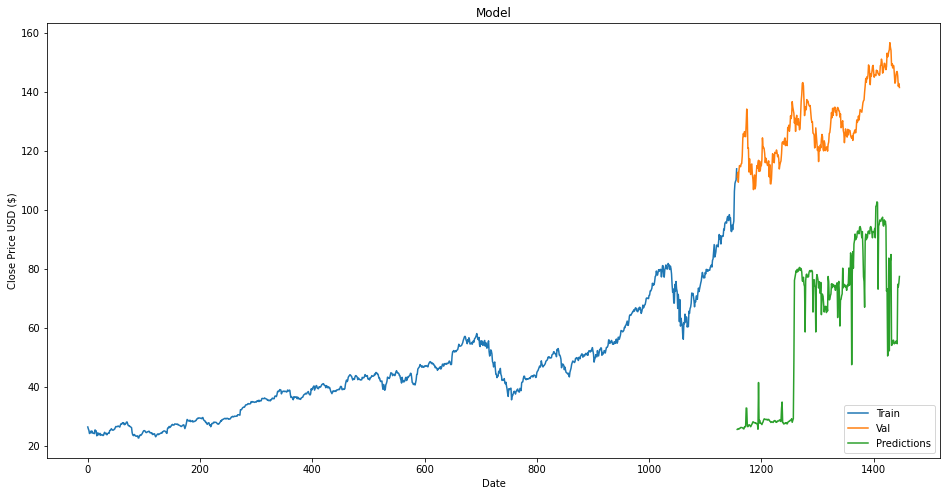

In [77]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
